In [1]:
import re
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc 
import pandas as pd
rc("font", family="Times New Roman", size=25)
rc("axes", linewidth = 1)
rc("lines", linewidth = 1)
rc("xtick.major", pad = 5, width = 1)
rc("ytick.major", pad = 5, width = 1)
rc("xtick.minor", width = 1)
rc("ytick.minor", width = 1)
rc('ytick', direction='in', labelsize=25)
rc('xtick', direction='in', labelsize=25)
rc('axes', labelsize=30)
plt.rcParams.update({'axes.labelsize': 30})

In [2]:
pii=3.1415926/180.0#rad
R0 = 8.15  # kpc
filnam = 'hii_dis_v1.dat'
dat=open(filnam)
slist=[]
for line in dat:
        s=line.strip().split('\t')
        slist.append(s)
Name=[]#np.array(slist[0])[0][0:15]
type=[]#np.array(slist[0])[0][16:17]
l=[]#np.array(slist[0])[0][19:25]
b=[]#np.array(slist[0])[0][25:35]
R=[]#np.array(slist[0])[0][35:41]
dist=[]#np.array(slist[0])[0][41:51]
distl=[]#np.array(slist[0])[0][51:61]
disth=[]#np.array(slist[0])[0][61:69]
for i in range(len(slist)):
            Name.append(np.array(slist[i])[0][0:15])
            type.append(np.array(slist[i])[0][16:17])
            l.append(float(np.array(slist[i])[0][17:25]))
            b.append(float(np.array(slist[i])[0][25:34]))
            R.append(float(np.array(slist[i])[0][34:41]))
            dist.append(float(np.array(slist[i])[0][41:51]))
            distl.append(float(np.array(slist[i])[0][51:61]))
            disth.append(float(np.array(slist[i])[0][61:69]))
l=np.array(l)
b=np.array(b)
dist=np.array(dist)
distl=np.array(distl)
disth=np.array(disth)

In [6]:
vtable=pd.read_csv(r'../Data/vtable1.csv')
l=vtable['l'].astype(float)
b=vtable['b'].astype(float)
dist=np.nan_to_num(vtable['rpgeo']).astype(float)
distl=np.nan_to_num(vtable['b_rpgeo']).astype(float)
disth=np.nan_to_num(vtable['B_rpgeo']).astype(float)

In [7]:
vtable

,Name,Cl,l,b,R,rgeo,b_rgeo,B_rgeo,rpgeo,b_rpgeo,...,Pdl,Pdu,VLSR,Line,note1,Vi1,Vm1,Mol,Dist,HDist
0,G000.003+00.127,K,0.004,0.128,206.0,2125.364,2063.589,2183.36,2096.525,2028.747,...,2272.426128,2433.887343,-5.5,H\alpha,h,-5.5,NaN,,NaN,1.5
1,G310.6-1.6,NaN,310.600,-1.600,NaN,10.000,3.000,3.00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
x = dist/1000*np.sin(l*pii)*np.cos(b*pii)
y = R0 - dist/1000*np.cos(l*pii)*np.cos(b*pii)

x_l = distl/1000*np.sin(l*pii)*np.cos(b*pii)
y_l = R0 - distl/1000*np.cos(l*pii)*np.cos(b*pii)

x_h = disth/1000*np.sin(l*pii)*np.cos(b*pii)
y_h = R0 - disth/1000*np.cos(l*pii)*np.cos(b*pii)

In [9]:
def Cart(l,b,D):
        lr=np.deg2rad(l)
        br=np.deg2rad(b)
        D=D/1000
        XDet=D*np.cos(br)*np.sin(lr)
        YDet=R0-D*np.cos(br)*np.cos(lr)
        return XDet, YDet
# Cart(l,b,dist)[0]

In [10]:
def spiral_arm(beta, beta_range, radius, fai_l, fai_h):
    ang_l = np.arange(100)/99.0*(beta-beta_range[0])+beta_range[0]
    ang_h = (np.arange(100)+1.0)/99.0*(beta_range[1]-beta)+beta

    alogr = -np.tan(fai_l*np.pi/180.0)*(ang_l - beta)*np.pi/180.0
    dis_l = radius*np.exp(alogr)
    
    alogr = -np.tan(fai_h*np.pi/180.0)*(ang_h - beta)*np.pi/180.0
    dis_h = radius*np.exp(alogr)       
    
    xx_l = dis_l*np.sin(ang_l*np.pi/180.0)
    yy_l = dis_l*np.cos(ang_l*np.pi/180.0)

    xx_h = dis_h*np.sin(ang_h*np.pi/180.0)
    yy_h = dis_h*np.cos(ang_h*np.pi/180.0)    

    xx = np.concatenate((xx_l, xx_h))
    yy = np.concatenate((yy_l, yy_h))
    
    return xx,yy



In [11]:
para='spiral_arm_Reid2019.para'
parad=open(para)
data=[]
for line in parad:
        s=line.strip().split('\t')
        data.append(s)
range1=[]
range2=[]
beta=[]
sname=[]
SR=[]
Fail=[]
Faih=[]
Width=[]
for i in range(len(data)):
    range1.append(float(np.array(data[i])[0][0:3]))
    range2.append(float(np.array(data[i])[0][3:9]))
    beta.append(float(np.array(data[i])[0][9:12]))
    SR.append(float(np.array(data[i])[0][12:20]))
    Fail.append(float(np.array(data[i])[0][20:26]))
    Faih.append(float(np.array(data[i])[0][26:31]))
    Width.append(float(np.array(data[i])[0][31:38]))
    sname.append(np.array(data[i])[0][44:])

In [12]:
Width=np.array(Width)*1.2

In [13]:
Width

array([0.168, 0.276, 0.324, 0.372, 0.42 , 0.78 ])

In [14]:
sp1=spiral_arm(beta[0],[range1[0],range2[0]],SR[0],Fail[0],Faih[0])
sp1L=spiral_arm(beta[0],[range1[0],range2[0]],SR[0]-Width[0],Fail[0],Faih[0])
sp1H=spiral_arm(beta[0],[range1[0],range2[0]],SR[0]+Width[0],Fail[0],Faih[0])

sp2=spiral_arm(beta[1],[range1[1],range2[1]],SR[1],Fail[1],Faih[1])
sp2L=spiral_arm(beta[1],[range1[1],range2[1]],SR[1]-Width[1],Fail[1],Faih[1])
sp2H=spiral_arm(beta[1],[range1[1],range2[1]],SR[1]+Width[1],Fail[1],Faih[1])

sp3=spiral_arm(beta[2],[range1[2],range2[2]],SR[2],Fail[2],Faih[2])
sp4=spiral_arm(beta[3],[range1[3],range2[3]],SR[3],Fail[3],Faih[3])
sp5=spiral_arm(beta[4],[range1[4],range2[4]],SR[4],Fail[4],Faih[4])
sp6=spiral_arm(beta[5],[range1[5],range2[5]],SR[5],Fail[5],Faih[5])

In [15]:
"""
def spiral_arm_width(beta, beta_range, radius, fai_l, fai_h, width):
    ang_l = np.arange(10000)/9999.0*(beta-beta_range[0])+beta_range[0]
    ang_h = (np.arange(10000)+1.0)/10000.0*(beta_range[1]-beta)+beta

    alogrl = -np.tan(fai_l*np.pi/180.0)*(ang_l - beta)*np.pi/180.0
    alogrh = -np.tan(fai_h*np.pi/180.0)*(ang_h - beta)*np.pi/180.0

    rad = radius-width
    dis_l = rad*np.exp(alogrl)
    dis_h = rad*np.exp(alogrh)       
    xx_l = dis_l*np.sin(ang_l*np.pi/180.0)
    yy_l = dis_l*np.cos(ang_l*np.pi/180.0)
    xx_h = dis_h*np.sin(ang_h*np.pi/180.0)
    yy_h = dis_h*np.cos(ang_h*np.pi/180.0)    

    xx_1 = [xx_l, xx_h]
    yy_1 = [yy_l, yy_h]
   

    rad = radius+width
    dis_l = rad*np.exp(alogrl)
    dis_h = rad*np.exp(alogrh)       
    xx_l = dis_l*np.sin(ang_l*np.pi/180.0)
    yy_l = dis_l*np.cos(ang_l*np.pi/180.0)
    xx_h = dis_h*np.sin(ang_h*np.pi/180.0)
    yy_h = dis_h*np.cos(ang_h*np.pi/180.0)    

    xx_2 = [xx_l, xx_h]
    yy_2 = [yy_l, yy_h]

#     xx=[xx_1,xx_2]
#     yy=[yy_1,yy_2]
    xx = [xx_1, xx_2[::-1], xx_1[0]]
    yy = [yy_1, yy_2[::-1], yy_1[0]]

    return xx, yy
"""

'\ndef spiral_arm_width(beta, beta_range, radius, fai_l, fai_h, width):\n    ang_l = np.arange(10000)/9999.0*(beta-beta_range[0])+beta_range[0]\n    ang_h = (np.arange(10000)+1.0)/10000.0*(beta_range[1]-beta)+beta\n\n    alogrl = -np.tan(fai_l*np.pi/180.0)*(ang_l - beta)*np.pi/180.0\n    alogrh = -np.tan(fai_h*np.pi/180.0)*(ang_h - beta)*np.pi/180.0\n\n    rad = radius-width\n    dis_l = rad*np.exp(alogrl)\n    dis_h = rad*np.exp(alogrh)       \n    xx_l = dis_l*np.sin(ang_l*np.pi/180.0)\n    yy_l = dis_l*np.cos(ang_l*np.pi/180.0)\n    xx_h = dis_h*np.sin(ang_h*np.pi/180.0)\n    yy_h = dis_h*np.cos(ang_h*np.pi/180.0)    \n\n    xx_1 = [xx_l, xx_h]\n    yy_1 = [yy_l, yy_h]\n   \n\n    rad = radius+width\n    dis_l = rad*np.exp(alogrl)\n    dis_h = rad*np.exp(alogrh)       \n    xx_l = dis_l*np.sin(ang_l*np.pi/180.0)\n    yy_l = dis_l*np.cos(ang_l*np.pi/180.0)\n    xx_h = dis_h*np.sin(ang_h*np.pi/180.0)\n    yy_h = dis_h*np.cos(ang_h*np.pi/180.0)    \n\n    xx_2 = [xx_l, xx_h]\n    yy_2 

In [16]:
import numpy as np

def spiral_arm_width(beta, beta_range, radius, fai_l, fai_h, width):
    
    ang_l = np.arange(100)/99.0*(beta-beta_range[0])+beta_range[0]
    ang_h = (np.arange(100)+1.0)/100.0*(beta_range[1]-beta)+beta
    
    alogrl = -np.tan(fai_l*np.pi/180.0)*(ang_l - beta)*np.pi/180.0
    alogrh = -np.tan(fai_h*np.pi/180.0)*(ang_h - beta)*np.pi/180.0
    
    
    rad = radius-width
    
    dis_l = rad*np.exp(alogrl)
    dis_h = rad*np.exp(alogrh)
    xx_l = dis_l*np.sin(ang_l*np.pi/180.0)
    yy_l = dis_l*np.cos(ang_l*np.pi/180.0)
    xx_h = dis_h*np.sin(ang_h*np.pi/180.0)
    yy_h = dis_h*np.cos(ang_h*np.pi/180.0)
    
    
    xx_1 = [xx_l,xx_h]
    yy_1 = [yy_l,yy_h]
    
    rad = radius+width
    
    dis_l = rad*np.exp(alogrl)
    dis_h = rad*np.exp(alogrh)       
    xx_l = dis_l*np.sin(ang_l*np.pi/180.0)
    yy_l = dis_l*np.cos(ang_l*np.pi/180.0)
    xx_h = dis_h*np.sin(ang_h*np.pi/180.0)
    yy_h = dis_h*np.cos(ang_h*np.pi/180.0) 
    
    xx_2 = [xx_l,xx_h]
    yy_2 = [yy_l,yy_h]
    
    
    xx = [xx_1, np.flip(xx_2), xx_1[0]]
    yy = [yy_1, np.flip(yy_2), yy_1[0]]
#     xx=[xx_1,xx_2]
#     yy=[yy_1,yy_2]
    return xx, yy


In [17]:
W1=spiral_arm_width(beta[0],[range1[0],range2[0]],SR[0],Fail[0],Faih[0], Width[0])

W2=spiral_arm_width(beta[1],[range1[1],range2[1]],SR[1],Fail[1],Faih[1], Width[1])

W3=spiral_arm_width(beta[2],[range1[2],range2[2]],SR[2],Fail[2],Faih[2], Width[2])

W4=spiral_arm_width(beta[3],[range1[3],range2[3]],SR[3],Fail[3],Faih[3], Width[3])
W5=spiral_arm_width(beta[4],[range1[4],range2[4]],SR[4],Fail[4],Faih[4], Width[4])
W6=spiral_arm_width(beta[5],[range1[5],range2[5]],SR[5],Fail[5],Faih[5], Width[5])

In [18]:
xx1=np.array(W1[0][0]).flatten()
yy1=np.array(W1[1][0]).flatten()

xx2=np.array(W1[0][1]).flatten()
yy2=np.array(W1[1][1]).flatten()

xx3=np.array(W2[0][0]).flatten()
yy3=np.array(W2[1][0]).flatten()

xx4=np.array(W2[0][1]).flatten()
yy4=np.array(W2[1][1]).flatten()

xx5=np.array(W3[0][0]).flatten()
yy5=np.array(W3[1][0]).flatten()

xx6=np.array(W3[0][1]).flatten()
yy6=np.array(W3[1][1]).flatten()

xx7=np.array(W4[0][0]).flatten()
yy7=np.array(W4[1][0]).flatten()

xx8=np.array(W4[0][1]).flatten()
yy8=np.array(W4[1][1]).flatten()

xx9=np.array(W5[0][0]).flatten()
yy9=np.array(W5[1][0]).flatten()

xx10=np.array(W5[0][1]).flatten()
yy10=np.array(W5[1][1]).flatten()

xx11=np.array(W6[0][0]).flatten()
yy11=np.array(W6[1][0]).flatten()

xx12=np.array(W6[0][1]).flatten()
yy12=np.array(W6[1][1]).flatten()

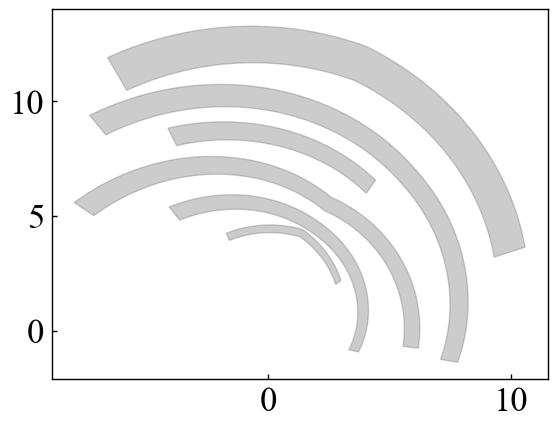

In [19]:
vsx1 = np.array([xx1,xx2]).flatten()
vsy1 = np.array([yy1,yy2]).flatten()

vsx2 = np.array([xx3,xx4]).flatten()
vsy2 = np.array([yy3,yy4]).flatten()

vsx3 = np.array([xx5,xx6]).flatten()
vsy3 = np.array([yy5,yy6]).flatten()

vsx4 = np.array([xx7,xx8]).flatten()
vsy4 = np.array([yy7,yy8]).flatten()

vsx5 = np.array([xx9,xx10]).flatten()
vsy5 = np.array([yy9,yy10]).flatten()

vsx6 = np.array([xx11,xx12]).flatten()
vsy6 = np.array([yy11,yy12]).flatten()
fig, ax = plt.subplots()
plt.fill(vsx1,vsy1,alpha=0.4,color='gray')
plt.fill(vsx2,vsy2,alpha=0.4,color='gray')
plt.fill(vsx3,vsy3,alpha=0.4,color='gray')
plt.fill(vsx4,vsy4,alpha=0.4,color='gray')
plt.fill(vsx5,vsy5,alpha=0.4,color='gray')
plt.fill(vsx6,vsy6,alpha=0.4,color='gray')

In [24]:
import pandas as pd
from astropy.io import fits
# maser=pd.read_csv(r'D:\HII\maser.csv')
# # plx=maser['plx'].astype(float)
# ml=[]
# mb=[]

fe=fits.open(r'J_ApJ_885_131_table1.dat.fits')[1]
mN=fe.data.field(0)
plx=fe.data.field(9).astype(float)
# for i in range(len(mN)):
#     ml.append(float(mN[i][1:7]))
#     mb.append(float(mN[i][7:14]))
# mx,my=Cart(ml,mb,1/plx*1000)
eplx=fe.data.field(10).astype(float)
# mxl,myl=Cart(ml,mb,1/(plx+eplx)*1000)
# mxh,myh=Cart(ml,mb,1/(plx-eplx)*1000)

In [25]:
cc=['#fbb45d','#ef8183','#699ed4','#a4d9bb','#bfc0c2','#b88cc0']

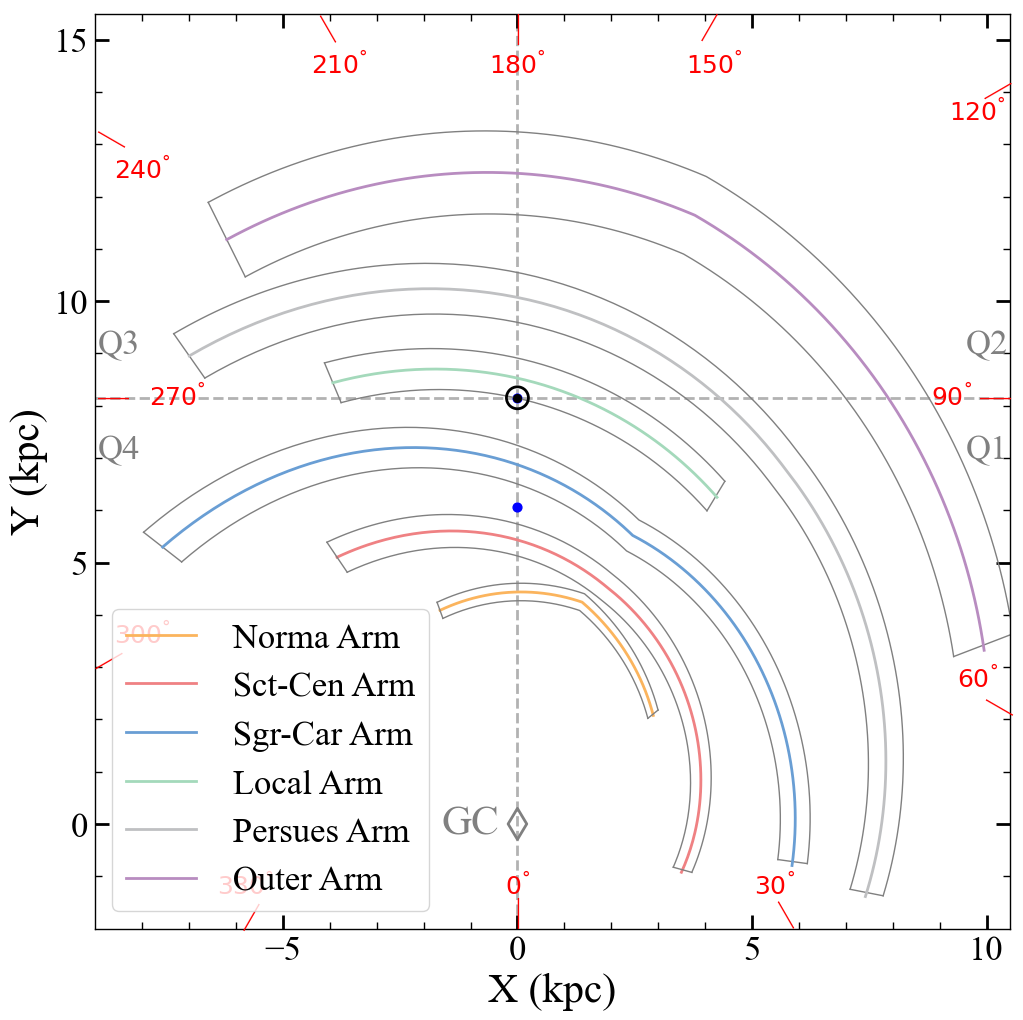

In [30]:
# from matplotlib.patches import Polygon
fig = plt.figure(figsize=(10,10))
position = [0.085, 0.085, 0.915, 0.915]
xmin = -9.
xmax = 10.5
ymin = -2.0
ymax = 15.5

xrange = [xmin,xmax]
yrange = [ymin,ymax]

ax = fig.add_axes(position)
ax.set_xlim(xrange)
ax.set_ylim(yrange)
ax.set_xlabel('X (kpc)')
ax.set_ylabel('Y (kpc)')
ax.set_title('')

c_col =['black','blue','red','grey'] 

plt.scatter(x,y, color='blue',s=40)
# plt.scatter(mx,my,color='gray',s=30,alpha=0.3)
for i in np.arange(len(x)):
        plt.plot([x_l[i],x_h[i]],[y_l[i],y_h[i]],color=c_col[1])
        
# for j in np.arange(len(mx)):
#         plt.plot([mxl[j],mxh[j]],[myl[j],myh[j]],color='gray',alpha=0.4)
plt.plot(sp1[0],sp1[1],color=cc[0],linewidth=2,label=sname[0]+' '+'Arm')

plt.plot(sp2[0],sp2[1],color=cc[1],linewidth=2,label=sname[1]+' '+'Arm')


plt.plot(xx1,yy1,color=c_col[3])
plt.plot(xx2,yy2,color=c_col[3])
plt.plot([xx1[0],xx2[-1]],[yy1[0],yy2[-1]],color=c_col[3])
plt.plot([xx1[-1],xx2[0]],[yy1[-1],yy2[0]],color=c_col[3])



plt.plot(xx3,yy3,color=c_col[3])
plt.plot(xx4,yy4,color=c_col[3])
plt.plot([xx3[0],xx4[-1]],[yy3[0],yy4[-1]],color=c_col[3])
plt.plot([xx3[-1],xx4[0]],[yy3[-1],yy4[0]],color=c_col[3])



plt.plot(xx5,yy5,color=c_col[3])
plt.plot(xx6,yy6,color=c_col[3])
plt.plot([xx5[0],xx6[-1]],[yy5[0],yy6[-1]],color=c_col[3])
plt.plot([xx5[-1],xx6[0]],[yy5[-1],yy6[0]],color=c_col[3])

plt.plot(xx7,yy7,color=c_col[3])
plt.plot(xx8,yy8,color=c_col[3])
plt.plot([xx7[0],xx8[-1]],[yy7[0],yy8[-1]],color=c_col[3])
plt.plot([xx7[-1],xx8[0]],[yy7[-1],yy8[0]],color=c_col[3])

plt.plot(xx9,yy9,color=c_col[3])
plt.plot(xx10,yy10,color=c_col[3])
plt.plot([xx9[0],xx10[-1]],[yy9[0],yy10[-1]],color=c_col[3])
plt.plot([xx9[-1],xx10[0]],[yy9[-1],yy10[0]],color=c_col[3])

plt.plot(xx11,yy11,color=c_col[3])
plt.plot(xx12,yy12,color=c_col[3])
plt.plot([xx11[0],xx12[-1]],[yy11[0],yy12[-1]],color=c_col[3])
plt.plot([xx11[-1],xx12[0]],[yy11[-1],yy12[0]],color=c_col[3])

plt.plot(sp3[0],sp3[1],color=cc[2],linewidth=2,label=sname[2]+' '+'Arm')
plt.plot(sp4[0],sp4[1],color=cc[3],linewidth=2,label=sname[3]+' '+'Arm')
plt.plot(sp5[0],sp5[1],color=cc[4],linewidth=2,label=sname[4]+' '+'Arm')
plt.plot(sp6[0],sp6[1],color=cc[5],linewidth=2,label=sname[5]+' '+'Arm')

plt.scatter(0,8.15,marker='o',edgecolor='black',s=250,color='None',linewidth=2,zorder=2)
plt.scatter(0,8.15,color='black',s=20,linewidth=2,zorder=2)
plt.axvline(0,zorder=0,color='gray',linewidth=2,linestyle='dashed',alpha=0.6)
plt.axhline(8.15,zorder=0,color='gray',linewidth=2,linestyle='dashed',alpha=0.6)

plt.scatter(0,0,marker='d',edgecolor='gray',s=250,color='none',linewidth=2,zorder=2)
plt.text(-1,0,'GC',horizontalalignment='center', color='gray',verticalalignment='center', fontsize=30)

plt.text(0,-2,'|',color='red',horizontalalignment='center',verticalalignment='bottom')
plt.text(10.16,8.28,'|',color='red',horizontalalignment='center',verticalalignment='top',rotation=90)
plt.text(0.,15.5,'|',color='red',horizontalalignment='center',verticalalignment='top',rotation=0)
plt.text(-8.65,8.28,'|',color='red',horizontalalignment='center',verticalalignment='top',rotation=90)

plt.text(5.075+0.64,-2,'|',color='red',horizontalalignment='center',verticalalignment='bottom',rotation=30)
plt.text(5.075+0.4,-1.2,r'$30^{\degree}$',horizontalalignment='center', verticalalignment='center', fontsize=18,rotation=0,color='red')
plt.text(10.25,2.08,'|',color='red',horizontalalignment='center',verticalalignment='bottom',rotation=60)
plt.text(9.8,2.75,r'$60^{\degree}$',horizontalalignment='center', verticalalignment='center', fontsize=18,rotation=0,color='red')
plt.text(10.18,13.88,'|',color='red',horizontalalignment='center',verticalalignment='bottom',rotation=120)
plt.text(9.8,13.6,r'$120^{\degree}$',horizontalalignment='center', verticalalignment='center', fontsize=18,rotation=0,color='red')
plt.text(4.,15.,'|',color='red',horizontalalignment='center',verticalalignment='bottom',rotation=150)
plt.text(4.2,14.5,r'$150^{\degree}$',horizontalalignment='center', verticalalignment='center', fontsize=18,rotation=0,color='red')
plt.text(-4.15,14.95,'|',color='red',horizontalalignment='center',verticalalignment='bottom',rotation=210)
plt.text(-3.8,14.5,r'$210^{\degree}$',horizontalalignment='center', verticalalignment='center', fontsize=18,rotation=0,color='red')
plt.text(-8.75,12.9,'|',color='red',horizontalalignment='center',verticalalignment='bottom',rotation=240)
plt.text(-8,12.5,r'$240^{\degree}$',horizontalalignment='center', verticalalignment='center', fontsize=18,rotation=0,color='red')
plt.text(-8.75,2.9,'|',color='red',horizontalalignment='center',verticalalignment='bottom',rotation=300)
plt.text(-8,3.6,r'$300^{\degree}$',horizontalalignment='center', verticalalignment='center', fontsize=18,rotation=0,color='red')
plt.text(-5.7,-2.08,'|',color='red',horizontalalignment='center',verticalalignment='bottom',rotation=330)
plt.text(-5.8,-1.2,r'$330^{\degree}$',horizontalalignment='center', verticalalignment='center', fontsize=18,rotation=0,color='red')

plt.text(0,-1.2,r'$0^{\degree}$',horizontalalignment='center', verticalalignment='center', fontsize=18,color='red')
plt.text(9.25,8.15,r'$90^{\degree}$',horizontalalignment='center', verticalalignment='center', fontsize=18,rotation=0,color='red')
plt.text(0,14.5,r'$180^{\degree}$',horizontalalignment='center', verticalalignment='center', fontsize=18,rotation=0,color='red')
plt.text(-7.25,8.15,r'$270^{\degree}$',horizontalalignment='center', verticalalignment='center', fontsize=18,rotation=0,color='red')

plt.text(xmax-0.5,R0-1.0,'Q1',horizontalalignment='center', verticalalignment='center',color='gray')
plt.text(xmax-0.5,R0+1.0,'Q2',horizontalalignment='center', verticalalignment='center',color='gray')
plt.text(xmin+0.5,R0+1.0,'Q3',horizontalalignment='center', verticalalignment='center',color='gray')
plt.text(xmin+0.5,R0-1.0,'Q4',horizontalalignment='center', verticalalignment='center',color='gray')

plt.tick_params(direction='in',axis='both', which='major',width=2,length=10,top=True,right=True)
plt.tick_params(direction='in',axis='both', which='minor',length=5,top=True,right=True)
plt.xticks([-5,0,5,10])
plt.yticks([0,5,10,15])
plt.minorticks_on()
plt.legend()
plt.show()

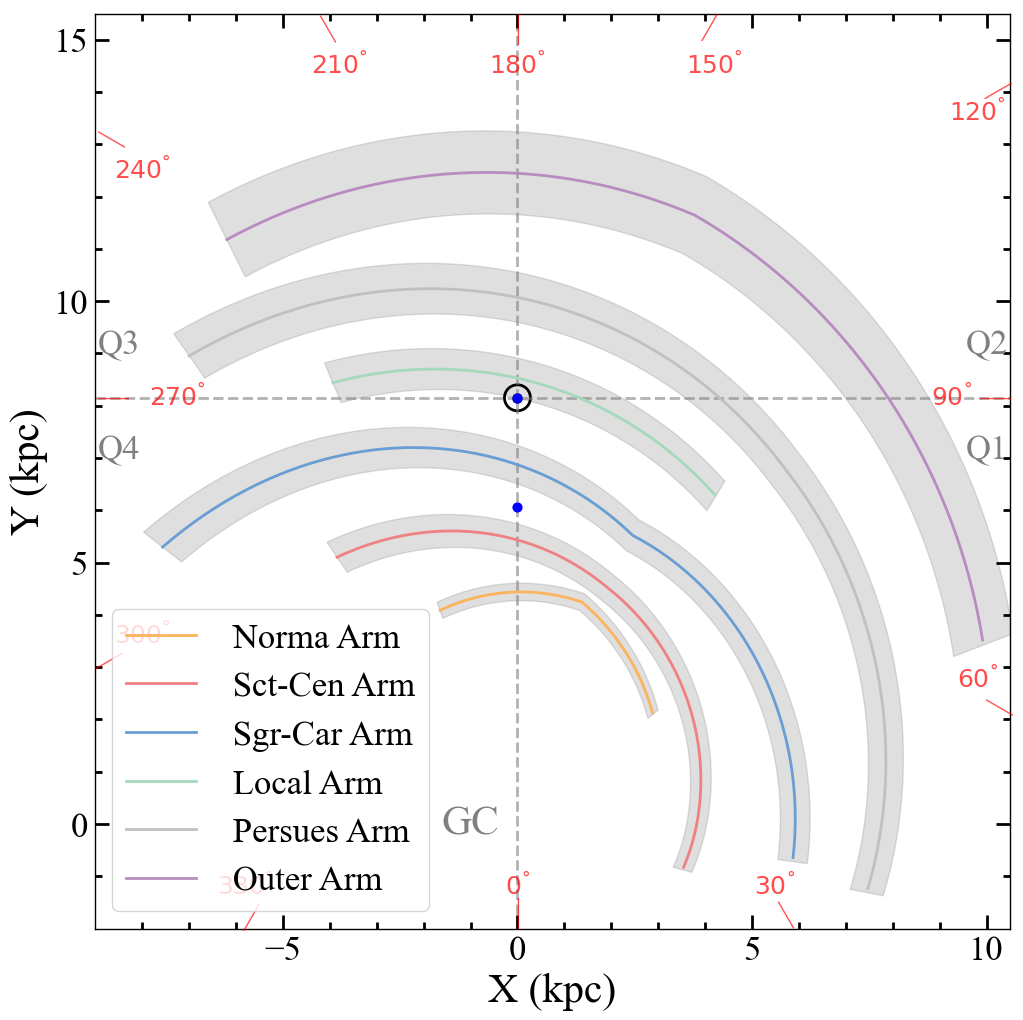

In [29]:
fig = plt.figure(figsize=(10,10))
position = [0.085, 0.085, 0.915, 0.915]
xmin = -9.
xmax = 10.5
ymin = -2.0
ymax = 15.5

xrange = [xmin,xmax]
yrange = [ymin,ymax]

ax = fig.add_axes(position)
ax.set_xlim(xrange)
ax.set_ylim(yrange)
ax.set_xlabel('X (kpc)')
ax.set_ylabel('Y (kpc)')
ax.set_title('')

c_col =['black','blue','red','grey'] 

plt.scatter(x,y, color='blue',s=40,zorder=1)
# plt.scatter(mx,my,color='gray',s=30,alpha=0.35,zorder=1)
for i in np.arange(len(x)):
        plt.plot([x_l[i],x_h[i]],[y_l[i],y_h[i]],color=c_col[1],zorder=1)
        
# for j in np.arange(len(mx)):
#         plt.plot([mxl[j],mxh[j]],[myl[j],myh[j]],color='gray',alpha=0.4)
plt.plot(sp1[0][0:-2],sp1[1][0:-2],color=cc[0],linewidth=2,label=sname[0]+' '+'Arm',zorder=1)

plt.plot(sp2[0][0:-2],sp2[1][0:-2],color=cc[1],linewidth=2,label=sname[1]+' '+'Arm',zorder=1)
plt.fill(vsx1,vsy1,alpha=0.25,color='gray',zorder=0)
plt.fill(vsx2,vsy2,alpha=0.25,color='gray',zorder=0)
plt.fill(vsx3,vsy3,alpha=0.25,color='gray',zorder=0)
plt.fill(vsx4,vsy4,alpha=0.25,color='gray',zorder=0)
plt.fill(vsx5,vsy5,alpha=0.25,color='gray',zorder=0)
plt.fill(vsx6,vsy6,alpha=0.25,color='gray',zorder=0)

plt.plot(sp3[0][0:-2],sp3[1][0:-2],color=cc[2],linewidth=2,label=sname[2]+' '+'Arm',zorder=1)
plt.plot(sp4[0][0:-2],sp4[1][0:-2],color=cc[3],linewidth=2,label=sname[3]+' '+'Arm',zorder=1)
plt.plot(sp5[0][0:-2],sp5[1][0:-2],color=cc[4],linewidth=2,label=sname[4]+' '+'Arm',zorder=1)
plt.plot(sp6[0][0:-2],sp6[1][0:-2],color=cc[5],linewidth=2,label=sname[5]+' '+'Arm',zorder=1)

plt.scatter(0,8.15,marker='o',edgecolor='black',s=350,color='None',linewidth=2,zorder=0)
plt.scatter(0,8.15,color='black',s=30,linewidth=2,zorder=0)
plt.axvline(0,zorder=0,color='gray',linewidth=2,linestyle='dashed',alpha=0.6)
plt.axhline(8.15,zorder=0,color='gray',linewidth=2,linestyle='dashed',alpha=0.6)

# plt.scatter(0,0,marker='d',edgecolor='gray',s=250,color='none',linewidth=2,zorder=2)
plt.text(-1,0,'GC',horizontalalignment='center', color='gray',verticalalignment='center', fontsize=30)

plt.text(0,-2,'|',color='red',horizontalalignment='center',verticalalignment='bottom',alpha=0.7)
plt.text(10.16,8.28,'|',color='red',horizontalalignment='center',verticalalignment='top',rotation=90,alpha=0.7)
plt.text(0.,15.5,'|',color='red',horizontalalignment='center',verticalalignment='top',rotation=0,alpha=0.7)
plt.text(-8.65,8.28,'|',color='red',horizontalalignment='center',verticalalignment='top',rotation=90,alpha=0.7)

plt.text(5.075+0.64,-2,'|',color='red',horizontalalignment='center',verticalalignment='bottom',rotation=30,alpha=0.7)
plt.text(5.075+0.4,-1.2,r'$30^{\degree}$',horizontalalignment='center', verticalalignment='center', fontsize=18,rotation=0,color='red',alpha=0.7)
plt.text(10.25,2.08,'|',color='red',horizontalalignment='center',verticalalignment='bottom',rotation=60,alpha=0.7)
plt.text(9.8,2.75,r'$60^{\degree}$',horizontalalignment='center', verticalalignment='center', fontsize=18,rotation=0,color='red',alpha=0.7)
plt.text(10.18,13.88,'|',color='red',horizontalalignment='center',verticalalignment='bottom',rotation=120,alpha=0.7)
plt.text(9.8,13.6,r'$120^{\degree}$',horizontalalignment='center', verticalalignment='center', fontsize=18,rotation=0,color='red',alpha=0.7)
plt.text(4.,15.,'|',color='red',horizontalalignment='center',verticalalignment='bottom',rotation=150,alpha=0.7)
plt.text(4.2,14.5,r'$150^{\degree}$',horizontalalignment='center', verticalalignment='center', fontsize=18,rotation=0,color='red',alpha=0.7)
plt.text(-4.15,14.95,'|',color='red',horizontalalignment='center',verticalalignment='bottom',rotation=210,alpha=0.7)
plt.text(-3.8,14.5,r'$210^{\degree}$',horizontalalignment='center', verticalalignment='center', fontsize=18,rotation=0,color='red',alpha=0.7)
plt.text(-8.75,12.9,'|',color='red',horizontalalignment='center',verticalalignment='bottom',rotation=240,alpha=0.7)
plt.text(-8,12.5,r'$240^{\degree}$',horizontalalignment='center', verticalalignment='center', fontsize=18,rotation=0,color='red',alpha=0.7)
plt.text(-8.75,2.9,'|',color='red',horizontalalignment='center',verticalalignment='bottom',rotation=300,alpha=0.7)
plt.text(-8,3.6,r'$300^{\degree}$',horizontalalignment='center', verticalalignment='center', fontsize=18,rotation=0,color='red',alpha=0.7)
plt.text(-5.7,-2.08,'|',color='red',horizontalalignment='center',verticalalignment='bottom',rotation=330,alpha=0.7)
plt.text(-5.8,-1.2,r'$330^{\degree}$',horizontalalignment='center', verticalalignment='center', fontsize=18,rotation=0,color='red',alpha=0.7)

plt.text(0,-1.2,r'$0^{\degree}$',horizontalalignment='center', verticalalignment='center', fontsize=18,color='red',alpha=0.7)
plt.text(9.25,8.15,r'$90^{\degree}$',horizontalalignment='center', verticalalignment='center', fontsize=18,rotation=0,color='red',alpha=0.7)
plt.text(0,14.5,r'$180^{\degree}$',horizontalalignment='center', verticalalignment='center', fontsize=18,rotation=0,color='red',alpha=0.7)
plt.text(-7.25,8.15,r'$270^{\degree}$',horizontalalignment='center', verticalalignment='center', fontsize=18,rotation=0,color='red',alpha=0.7)

plt.text(xmax-0.5,R0-1.0,'Q1',horizontalalignment='center', verticalalignment='center',color='gray')
plt.text(xmax-0.5,R0+1.0,'Q2',horizontalalignment='center', verticalalignment='center',color='gray')
plt.text(xmin+0.5,R0+1.0,'Q3',horizontalalignment='center', verticalalignment='center',color='gray')
plt.text(xmin+0.5,R0-1.0,'Q4',horizontalalignment='center', verticalalignment='center',color='gray')

plt.tick_params(direction='in',axis='both', which='major',width=2,length=10,top=True,right=True)
plt.tick_params(direction='in',axis='both', which='minor',width=2,length=5,top=True,right=True)
plt.xticks([-5,0,5,10])
plt.yticks([0,5,10,15])
plt.minorticks_on()
plt.legend()
plt.show()

In [90]:
10.15*np.sin(30*np.pi/180)

5.074999999999999

In [519]:
8.15-5.07

3.08

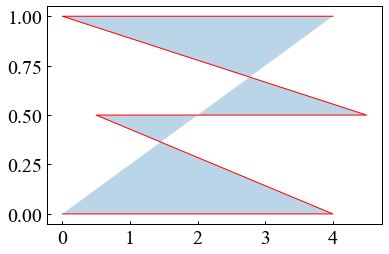

In [595]:
x = [0, 1, 2, 3, 4, 0.5, 1.5, 2.5, 3.5, 4.5, 0, 1, 2, 3, 4]
y = [0, 0, 0, 0, 0, 0.5, 0.5, 0.5, 0.5, 0.5, 1, 1, 1, 1, 1]

# 绘制不规则形状
plt.plot(x, y, color='red')

# 填充不规则形状
plt.fill(x, y, alpha=0.3)

# 显示图形
plt.show()